# How to integrate Financial Data from LSEG to Excel with Xlwings Pro - Part 2

**Last Updated**: February 2025

## Overview

This notebook is the second part of the series that demonstrate how to export financial data and report from Python/Jupyter application to Excel report file using xlwings CE and xlwings Pro libraries. The demo applications use content from the ease-of-use [LSEG Data Library for Python](https://developers.lseg.com/en/api-catalog/lseg-data-platform/lseg-data-library-for-python) (Data Library version 2) as an example of data set.

This second notebook is focusing on xlwings Reports, Embedded Code, and PDF features. 

## Introduction to xlwings

[xlwings](https://www.xlwings.org) is a Python library that makes it easy to call Python from Excel and vice versa on Windows and macOS. The library lets you automate Excel from Python source code to produce reports or to interact with Jupyter notebook applications. It also allows you to replace VBA macros with Python Code or write UDFs (user defined functions - Windows only).
* The [xlwings CE](https://docs.xlwings.org/en/stable) is a free and open-source library ([BSD-licensed](https://opensource.org/licenses/BSD-3-Clause)) which provides basic functionalities to lets developers integrate Python with Excel. 
* The [xlwings PRO](https://www.xlwings.org/pricing) provides more advance features such as [reports](https://www.xlwings.org/reporting), embedded Python code in Excel, one-click installers for easy deployment, video training, dedicated support and much more. 
 

*Note*:
- This notebook is based on xlwings versions **0.33.9** and Python 3.10.10.

## Introduction to the Data Library for Python

The [Data Library for Python](https://developers.lseg.com/en/api-catalog/lseg-data-platform/lseg-data-library-for-python) provides a set of ease-of-use interfaces offering coders uniform access to the breadth and depth of financial data and services available on the Workspace, RDP, and Real-Time Platforms. The API is designed to provide consistent access through multiple access channels and target both Professional Developers and Financial Coders. Developers can choose to access content from the desktop, through their deployed streaming services, or directly to the cloud. With the Data Library, the same Python code can be used to retrieve data regardless of which access point you choose to connect to the platform.


![Figure-1](images/datalib_image.png "Data Library Diagram") 

The Data Library are available in the following programming languages:

- [Python](https://developers.lseg.com/en/api-catalog/lseg-data-platform/lseg-data-library-for-python)
- [.NET](https://developers.lseg.com/en/api-catalog/lseg-data-platform/lseg-data-library-for-net)
- [TypeScript](https://developers.lseg.com/en/api-catalog/refinitiv-data-platform/refinitiv-data-library-for-typescript)

For more deep detail regarding the Data Library for Python, please refer to the following articles and tutorials:

- [Quickstart](https://developers.lseg.com/en/api-catalog/lseg-data-platform/lseg-data-library-for-python/quick-start).
- [Documentation](https://developers.lseg.com/en/api-catalog/lseg-data-platform/lseg-data-library-for-python/documentation).
- [Tutorials](https://developers.lseg.com/en/api-catalog/lseg-data-platform/lseg-data-library-for-python/tutorials).
- [GitHub](https://github.com/LSEG-API-Samples/Example.DataLibrary.Python).


### Disclaimer

This project is based on Data Library Python versions **2.0.1** using the Desktop Session only.

## xlwings Reports

The [xlwings Reports](https://www.xlwings.org/reporting) is part of [xlwings PRO ](https://www.xlwings.org/pricing) and a solution for template-based Excel and PDF reporting. The xlwings Reports let business users design and maintain their reports directly within Excel without being dependent on a dedicated reporting team or Python programmer.

The main features of the xlwings Reports are the following:
- **Separation of code and design**: Users without coding skills can change the template on their own without having to touch the Python code.
- **Template variables**: Python variables (between curly braces) can be directly used in cells, e.g. ```{{ title }}```. They act as placeholders that will be replaced by the actual values.
- **Frames for dynamic tables**: Frames are vertical containers that dynamically align and style tables that have a variable number of rows.

You can get a free trial for xlwings PRO [here](https://www.xlwings.org/trial), then follow the instruction on [How to activate xlwings PRO](https://docs.xlwings.org/en/stable/installation.html#how-to-activate-xlwings-pro) page.

## TSMC vs Global ounderies Report Template Preparation

We will use [TSMC](https://www.tsmc.com/english) (**2330.TW**) and [GlobalFounderies](https://gf.com/) (**GFO.O**) stock price comparison as example data for this xlwings Reports file. 

Firstly, we create the Excel template as *part2_workspace_report_template.xlsx* file. The report template contains two sheets, one for daily pricing comparison and one for volume comparison.  

The daily pricing sheet template example is following:

![Figure-1](images/xlwingspro/xlwings_pro_template_1.png "Excel report template - Pricing sheet") 

### Templates Variables

You will noticed the double curly bracket placeholders like ```{{ tsmc_price_title}}```, ```{{ tsmc_price_df}}```, ```{{ gfo_graph }}```, etc in the Excel template file. They are called *templates variable*. xlwings Reports will replace those template variables with data (Pandas DataFrame, text, Matplotlib/Plotly Charts, etc) from the Python code automatically.

### Excel Table

Let take a closer look in the Daily Price Sheet, the ```{{ tsmc_price_df}}``` and ``` {{ gfo_price_df}}``` template variables are in the Excel Table.

![Figure-3](images/xlwingspro/xlwings_pro_template_2.png "Excel Table") 

Using Excel tables is the recommended way to format tables as the styling (themes and alternating colors) can be applied dynamically across columns and rows. You can create Excel Table by go to ```Insert``` > ```Table``` menus and make sure that you activate ```My table has headers``` before clicking on OK. Then add the placeholder as usual on the top-left in your template.

*Note*:
* For Excel table support, you need at least [xlwings version 0.21.0](https://pypi.org/project/xlwings/0.21.0/).
* This feature supports Pandas DataFrame objects only (As of November 2020)


### Multiple Sheets

The xlwings Reports also support multiple Excel Sheets. Business users just create new Sheets in a single Excel template file and place template variables, frame tags in those Sheets based on the business requirements. xlwings PRO automatically  replaces associate data in all Sheets. Developers do not need to manually create and manipulate new Excel Sheet(s) anymore. 

Let's demonstrate with TSMC vs GlobalFounderies Volume comparison Sheet template.

![Figure-4](images/xlwingspro/xlwings_pro_template_3.png "Excel report template - Volume sheet") 

Now the template file is ready, we can continue on the data preparation side of the Python Code.

### Shape Text

The xlwings Report supports template text in Shapes objects like Boxes or Rectangles with the templates variable. Please see more detail on [the Shape Text feature page](https://docs.xlwings.org/en/stable/reports.html#shape-text).

## TSMC vs GlobalFounderies Data Preparation

### TSMC vs GlobalFounderies 90 Days daily pricing data with Data Library Content Layers

The Content layer refers to logical market data objects, representing financial items like level 1 market data prices and quotes, News, Historical Pricing, Bond Analytics and so on.

When comparing to the Function Layer, the Content Layer provides much more flexible manners for developers:
- Richer / fuller response e.g. metadata, sentiment scores - where available
- Using Asynchronous or Event-Driven operating modes - in addition to Synchronous
- Streaming Level 1 Market Price Data - as well as Snapshot requests

The Content layer can easily be used by both professional developers and financial coders. It provides great flexibility for familiar and commonly used financial data models.

Please find more detail regarding the Content Layer on [Data Library for Python document page](https://developers.lseg.com/en/api-catalog/lseg-data-platform/lseg-data-library-for-python/documentation).

In [108]:
# import xlwings and LD library and other required libraries
import xlwings as xw
from xlwings.pro.reports import create_report
import lseg.data as ld
from lseg.data.content import historical_pricing
from lseg.data.content.historical_pricing import Intervals
import matplotlib.pyplot as plt
import asyncio
import pandas as pd

pd.set_option('future.no_silent_downcasting', True)

The next step is to open a session defined in a custom configuration file.
     the current working directory) for the next steps.

This Jupyter Notebook is focusing on the *DesktopSession* only. However, the main logic for other session types are the same when interacts with xlwings library.

You should save a json file **refinitiv-data.config.json** having your Workspace App Key as follows:

```
{
    "logs": {
        "level": "debug",
        "transports": {
            "console": {
                "enabled": false
            },
            "file": {
                "enabled": false,
                "name": "refinitiv-data-lib.log"
            }
        }
    },
    "sessions": {
        "default": "desktop.workspace",
        "desktop": {
            "workspace": {
                "app-key": "YOUR APP KEY GOES HERE!"
            }
        }
    }
}
```
This file should be readily available (e.g. in the current working directory) for the next steps.

In [109]:
ld.open_session(config_name='./lseg-data.config.json')
#ld.open_session(config_name='./lseg-data.devrel.config.json')

<lseg.data.session.Definition object at 0x12a42d33670 {name='workspace'}>

Firstly, we define all the necessary variables for requesting data.

In [110]:
# Define RICs
tsmc_ric = '2330.TW'
gfo_ric = 'GFS.O'

fields = ['BID','ASK','OPEN_PRC','HIGH_1','LOW_1','TRDPRC_1','BLKVOLUM']
count = 90

This notebook example utilizes Python [asyncio library](https://docs.python.org/3.10/library/asyncio.html) to retrieve data from RD Content Layer's ```historical_pricing``` interface ```get_data_async()```  function asynchronously.

In [111]:
# Run two requests processes concurrently.
tasks = asyncio.gather(
    historical_pricing.summaries.Definition(
        universe = tsmc_ric, 
        fields = fields, 
        count = count,
        interval = Intervals.DAILY).get_data_async(closure='TSMC'),
    historical_pricing.summaries.Definition(
        universe = gfo_ric, 
        fields = fields, 
        count = count,
        interval = Intervals.DAILY).get_data_async(closure='GlobalFounderies')
)

Wait for all tasks to be complete, check responses and display results

In [112]:
await tasks

def display_reponse(response):
    print(response)
    print("\nReponse received for", response.closure)
    # if response.is_success:
    #     display(response.data.df)
    # else:
    #     print(response.http_status)

tsmc_interday, gfo_interday = tasks.result()

print("\nHistorical Pricing Summaries - Interday - TSMC")
tsmc_df_pricing = tsmc_interday.data.df
display(tsmc_df_pricing)

print("\nHistorical Pricing Summaries - Interday - GlobalFoundries ")
gfo_df_pricing = gfo_interday.data.df
display(gfo_df_pricing)


Historical Pricing Summaries - Interday - TSMC


2330.TW,BID,ASK,OPEN_PRC,HIGH_1,LOW_1,TRDPRC_1,BLKVOLUM
Date,,,,,,,
2024-10-14,1040,1045,1045,1055,1035,1045,1473000
2024-10-15,1070,1075,1050,1075,1050,1070,5755062
2024-10-16,1045,1050,1040,1070,1035,1045,6005000
2024-10-17,1035,1040,1050,1055,1030,1035,1082000
2024-10-18,1080,1085,1095,1100,1075,1085,1643000
...,...,...,...,...,...,...,...
2025-02-21,1090,1095,1085,1095,1080,1095,1869000
2025-02-24,1075,1080,1080,1085,1075,1075,2132000
2025-02-25,1050,1055,1055,1060,1050,1055,2945000



Historical Pricing Summaries - Interday - GlobalFoundries 


GFS.O,BID,ASK,OPEN_PRC,HIGH_1,LOW_1,TRDPRC_1,BLKVOLUM
Date,,,,,,,
2024-10-17,40.4,40.44,41.06,41.1699,40.2,40.4,272943
2024-10-18,40.43,40.46,40.61,40.98,40.29,40.43,201444
2024-10-21,40.01,40.04,40.31,40.5788,39.53,40.01,203035
2024-10-22,39.3,39.32,39.98,39.98,38.81,39.3,226325
2024-10-23,38.36,38.37,39.17,39.34,37.94,38.37,313163
...,...,...,...,...,...,...,...
2025-02-21,42.41,42.45,44.71,44.97,42.11,42.43,887779
2025-02-24,41.42,41.45,42.59,43.0,41.42,41.52,1341220
2025-02-25,40.64,40.68,41.33,42.16,40.51,40.64,317375


Now we have the raw TSMC and GlobalFounderies Daily Price data. The next phase is restructuring data to make it easier to read and to plot the report graphs.

### Restructure DataFrame 

Please note that the restructure steps are identical to the [part 1 notebook](./datalibrary_xwlingce.ipynb) application. We start by naming the index column to "Date"

In [113]:
tsmc_df_pricing.index.name = 'Date'
gfo_df_pricing.index.name = 'Date'

tsmc_df_pricing.head(5)

2330.TW,BID,ASK,OPEN_PRC,HIGH_1,LOW_1,TRDPRC_1,BLKVOLUM
Date,,,,,,,
2024-10-14,1040,1045,1045,1055,1035,1045,1473000
2024-10-15,1070,1075,1050,1075,1050,1070,5755062
2024-10-16,1045,1050,1040,1070,1035,1045,6005000
2024-10-17,1035,1040,1050,1055,1030,1035,1082000
2024-10-18,1080,1085,1095,1100,1075,1085,1643000


Next, we change all non-Date columns data type from String to Float.

In [114]:
for column in tsmc_df_pricing:
    tsmc_df_pricing[column]=tsmc_df_pricing[column].astype(float)

In [115]:
for column in gfo_df_pricing:
    gfo_df_pricing[column]=gfo_df_pricing[column].astype(float)

 We change the DataFrame Date index to be a data column. This will let us plot a graph using **Date** as X-Axis.

In [116]:
tsmc_df_pricing.reset_index(level=0, inplace=True)
gfo_df_pricing.reset_index(level=0, inplace=True)

tsmc_df_pricing.head(5)

2330.TW,Date,BID,ASK,OPEN_PRC,HIGH_1,LOW_1,TRDPRC_1,BLKVOLUM
0,2024-10-14,1040.0,1045.0,1045.0,1055.0,1035.0,1045.0,1473000.0
1,2024-10-15,1070.0,1075.0,1050.0,1075.0,1050.0,1070.0,5755062.0
2,2024-10-16,1045.0,1050.0,1040.0,1070.0,1035.0,1045.0,6005000.0
3,2024-10-17,1035.0,1040.0,1050.0,1055.0,1030.0,1035.0,1082000.0
4,2024-10-18,1080.0,1085.0,1095.0,1100.0,1075.0,1085.0,1643000.0


Then sort data in ascending order.

In [117]:
# Sort DataFrame by Date
tsmc_df_pricing.sort_values('Date',ascending=True,inplace=True)
gfo_df_pricing.sort_values('Date',ascending=True,inplace=True)

### Plotting Graphs

We use [Matplotlib](https://matplotlib.org/index.html)'s [Pyplot](https://matplotlib.org/api/pyplot_api.html) library to plot TSMC and GlobalFounderies Daily Pricing graphs. Each graph represents interday data for the last 90 days pricing information.

The source code also creates the [Pyplot Figure](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html) objects which we will pass them to the report file as pictures.

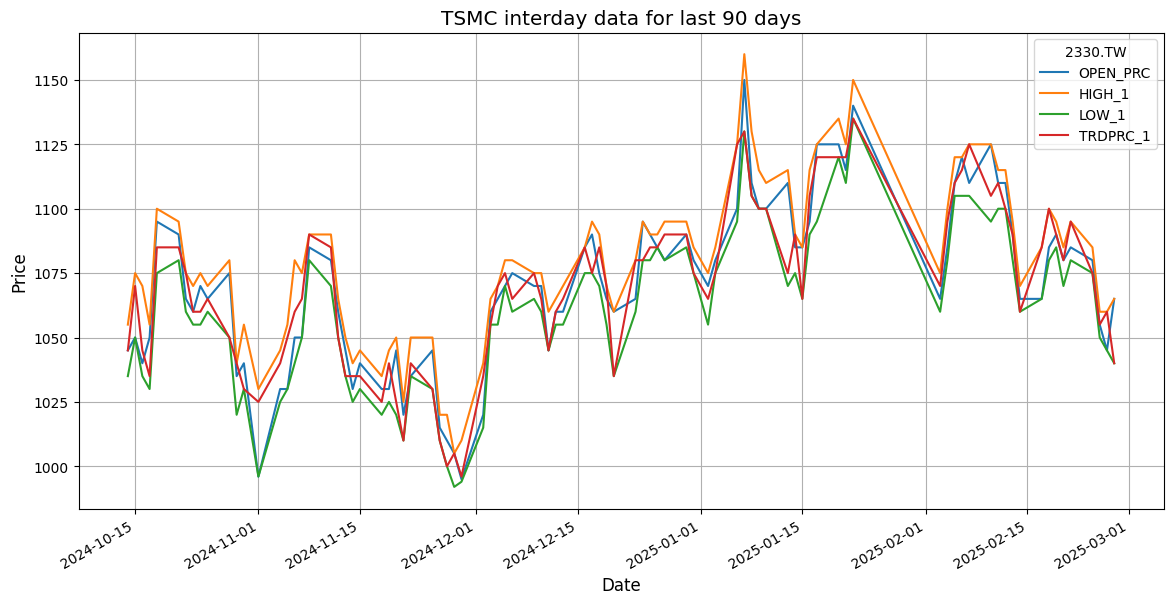

In [118]:
# Plotting a Graph for TSMC

columns = ['OPEN_PRC','HIGH_1','LOW_1','TRDPRC_1']

tsmc_df_pricing.set_index('Date',drop=True,inplace=True)
tsmc_figure = plt.figure()

plt.xlabel('Date', fontsize='large')
plt.ylabel('Price', fontsize='large')


# Create graph title from Company and RIC names dynamically.
plt.ticklabel_format(style = 'plain')
plt.title('TSMC interday data for last 90 days', color='black',fontsize='x-large')
ax = tsmc_figure.gca()

tsmc_df_pricing.plot(kind='line', ax = tsmc_figure.gca(),y=columns,figsize=(14,7) , grid = True)
plt.show()

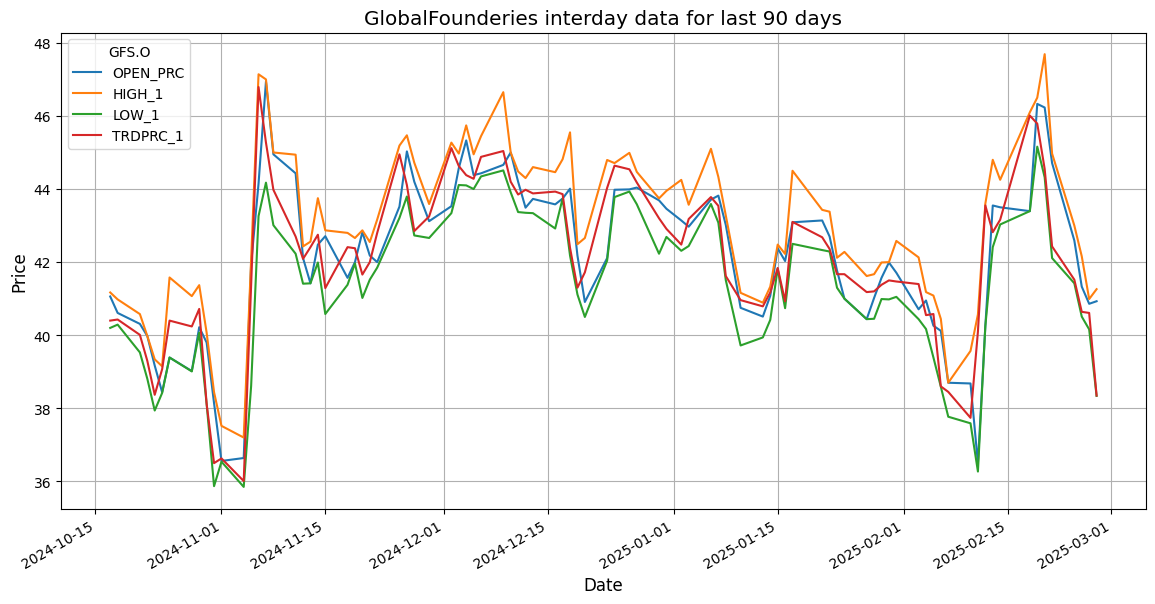

In [119]:
# Plotting a Graph for GlobalFounderies

columns = ['OPEN_PRC','HIGH_1','LOW_1','TRDPRC_1']

gfo_df_pricing.set_index('Date',drop=True,inplace=True)
gfo_figure = plt.figure()

plt.xlabel('Date', fontsize='large')
plt.ylabel('Price', fontsize='large')


# Create graph title from Company and RIC names dynamically.
plt.ticklabel_format(style = 'plain')
plt.title('GlobalFounderies interday data for last 90 days', color='black',fontsize='x-large')
ax = gfo_figure.gca()

gfo_df_pricing.plot(kind='line', ax = gfo_figure.gca(),y=columns,figsize=(14,7), grid = True )
plt.show()

Now we got the charts and figure objects ready for the Pricing Sheet report. Next, we will create the Volume comparison chart for the TSMC vs GlobalFounderies Volume comparison Sheet.

### TSMC vs GlobalFounderies Comparison

The next chart is block trading volume comparison  which is the *BLKVOLUM* data field. This chart contains TSMC vs GlobalFounderies data in the same figure.

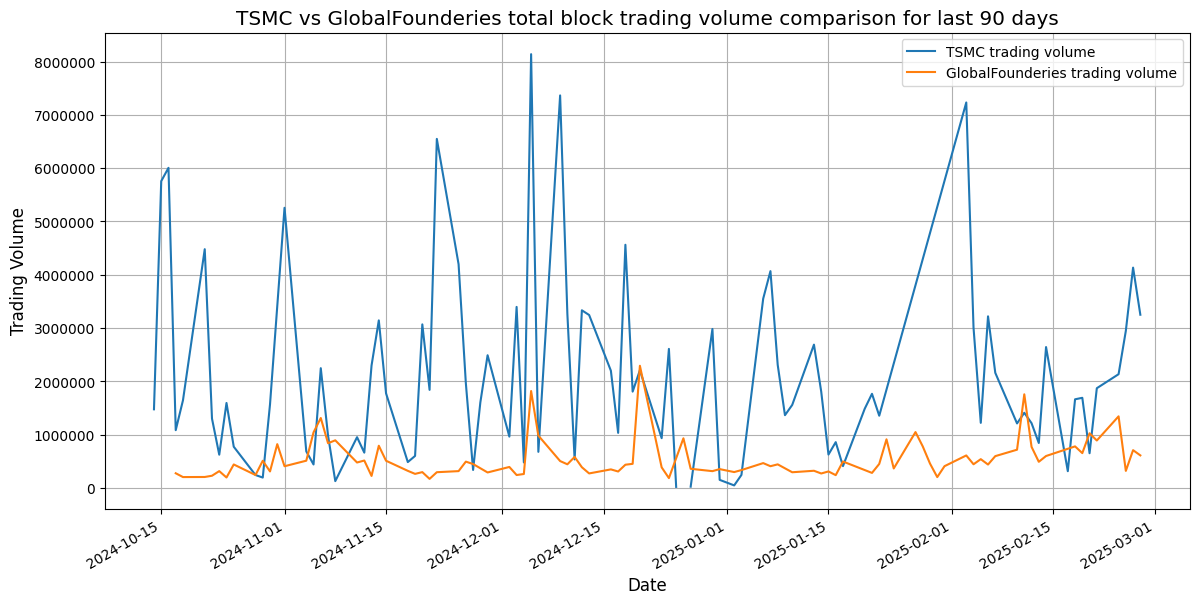

In [120]:
columns = ['BLKVOLUM']

# TSMC
tsmc_gfo_volume_figure = plt.figure()

plt.xlabel('Date', fontsize='large')
plt.ylabel('Trading Volume', fontsize='large')

# Create graph title from Company and RIC names dynamically.
plt.ticklabel_format(style = 'plain')
plt.title('TSMC vs GlobalFounderies total block trading volume comparison for last 90 days', color='black',fontsize='x-large')
ax = tsmc_gfo_volume_figure.gca()

tsmc_df_pricing.plot(kind='line', ax = tsmc_gfo_volume_figure.gca(),y=columns,figsize=(14,7) , label=['TSMC trading volume'],grid = True)

# GFO
gfo_df_pricing.plot(kind='line', ax = ax ,y=columns,figsize=(14,7), label=['GlobalFounderies trading volume'],grid = True)

plt.show()

## Generate Report with xlwings PRO

Now all data (DataFrame and Charts) is ready. We have demonstrated the [Reports-API](https://docs.xlwings.org/en/stable/api/reports.html) and with Reports API ```render_template()``` function in the [part-1 notebook](./datalibrary_xwlingce.ipynb) as the following example.

```Python
app = xw.App(visible=True)
report = app.render_template(
        'report_template.xlsx',
        'report_pro.xlsx',
        historical_title=historical_title,
        df_historical=df_historical.head(10),
        graph = fig)
```

The above code is ok for small data. This part-2 notebook will show more features that developers can work with the ```render_template()``` function for supporting various requirements and template variables.

Firstly, let's define static texts and template/report file location.

In [121]:
# Define Static texts and template/report file location.
tsmc_price_title='TSMC Hitorical Data'
gfo_price_title = 'GlobalFounderies Historical Data'

template_file = 'part2_workspace_report_template.xlsx' 
report_file = 'part2_ws_tsmc_vs_gfo.xlsx' 

Next, we create the Python [Dictionary](https://docs.python.org/3.10/tutorial/datastructures.html#dictionaries) object to collect all data for template variables. Please note that the Dictionary keys must have the same names as template variables.

In [122]:
# Create a Dictionary to collect all report data
data = dict(
    TSMC_price_title=tsmc_price_title,
    tsmc_price_df = tsmc_df_pricing.head(15),
    tsmc_graph = tsmc_figure,
    GFO_price_title = gfo_price_title,
    gfo_price_df = gfo_df_pricing.head(15),
    gfo_graph = gfo_figure,
    tsmc_gfo_volume_graph = tsmc_gfo_volume_figure
)

Then we call the ```render_template()``` function.

In [123]:
app = xw.App(visible=True)
report = app.render_template(
        template_file,
        report_file,
        **data)

The above ```render_template()``` function generates *part2_ws_tsmc_vs_gfo.xlsx* Excel report file with format/style defined in the *part2_workspace_report_template.xlsx* file and data that we pass to the function. With the default parameter, the part2_ws_tsmc_vs_gfo.xlsx file will be opened automatically.

![Figure-5](images/xlwingspro/xlwings_pro_report_1.png "xlwings pro report TSMC vs GlobalFounderies Daily Price Sheet") 


![Figure-6](images/xlwingspro/xlwings_pro_report_2.png "xlwings pro report TSMC vs GlobalFounderieso Volume Sheet") 

In [124]:
# close this Open Excel Report file
app.quit()  # Close the wb and quit the Excel instance

Developers can control the Excel instance with the xlwings App instance. For example, to run the report in a separate and hidden instance of Excel. This is a useful feature if Developers aim to create an application that runs as a background service to generate reports daily, monthly, or weekly based on the business requirements.

``` Python
with xw.App(visible=False) as app:
    report = app.render_template(
        template_file,
        report_file,
        **data)
```

Now the *part_2_daily_report.xlsx* Excel report file is created in the background.

## Close the Session

In [125]:
# -- Close Session, just calls close_session() function

ld.close_session()

## Exporting Excel report to PDF 

With newly release xlwings version *0.21.1* onward, the xlwings CE can export the whole Excel workbook or a subset of the sheets to a PDF file with xlwings ```Book.to_pdf()``` function. Please see more detail regarding the ```to_pdf``` function on [xlwings API reference page](https://docs.xlwings.org/en/latest/api/book.html#xlwings.Book.to_pdf).

We will demonstrate this feature with a quick Python source code from the [first notebook](./datalibrary_xwlingce.ipynb) to create the TSMC Daily Pricing report in PDF file format.

Firstly, create a new blank Excel report file and set a basic Report style.

In [126]:
wb = xw.Book() # Creating an new excel file. wb = xw.Book(filename) would open an existing file

tsmc_price_sheet = wb.sheets[0]
tsmc_price_sheet.name = 'TSMC Pricing'
tsmc_price_sheet.range("A1").value = 'TSMC Pricing'
tsmc_price_sheet.range("A1").api.Font.Size = 14 # Change font size
tsmc_price_sheet.range("A1").api.Font.ColorIndex = 2 # Change font color
tsmc_price_sheet.range('A1:H1').color = (0,0,255) # Change cell background color

# Set Pandas DataFrame object to newly created Excel File
tsmc_price_sheet.range("A2").value = tsmc_df_pricing.head(15)

# Set data table format

tsmc_price_sheet.range('2:1').api.Font.Bold = True #Make Column headers bold
tsmc_price_sheet.range('A2:H2').color = (144,238,144)  # Change cell background color
tsmc_price_sheet.autofit('c') # Set sheet autofit the width of column

Next, find the position of the last row of the report table as a position to plot a graph  (```tsmc_figure```).

In [127]:
# historical_sheet.cells.last_cell.row = row of the lower right cell

'''
change to your specified column, then go up until you hit a non-empty cell
'''
tsmc_price_last_row = tsmc_price_sheet.range((tsmc_price_sheet.cells.last_cell.row, 1)).end('up').row  

rng = tsmc_price_sheet.range('A{row}'.format(row = tsmc_price_last_row + 1))

# Resize inte_figure Figure object
tsmc_figure.set_figheight(6)
tsmc_figure.set_figwidth(6)

# Add figure to Excel report file as a picture
tsmc_price_sheet.pictures.add(tsmc_figure, name='MyPlot', update=True, top=rng.top, left=rng.left)

<Picture 'MyPlot' in <Sheet [Book1]TSMC Pricing>>

### Save to PDF file

Then call the ```Book.to_pdf()``` function to save this Excel report as PDF file.

In [128]:
# defaults to the same name as the workbook, in the same directory
wb.to_pdf('./part_2_xlwings_to_pdf.pdf') 

'./part_2_xlwings_to_pdf.pdf'

The Excel report with the financial content will be saved as *part_2_xlwings_to_pdf.pdf* file.

![Figure-10](images/xlwingspro/xlwings_pro_pdf.png "xlwings CE to PDF feature") 


Finally, we close the Excel file without saving.

In [129]:
wb.close()

## Conclusion and Next Step

The xlwings CE library lets Python developers integrate data with Excel in a simple way. The xlwings PRO allows Python developers and business users to work together to integrate data with Excel or PDF report file in much easier than xlwings CE.

The xlwings Reports help businesses and financial teams design the report to match their business requirement freely. The Python developers/data engineers can focus on how to retrieve and optimize data without no need to worry about report design, look & feel. xlwings Reports also help developers can automate report generator process periodicity (such as a daily, weekly, or monthly report).

If users want dynamic data and charts in the report file, the xlwings Embedded Code feature lets users run Python code in the macro-enabled Excel report directly. Users do not need to run a separate Python code themselves or wait for Developers to generate a report file for them.

The newly introduced ```to_pdf``` feature also lets developers export the Excel Workbook/Sheets to the PDF file. This function helps business users who do not have [Microsoft Office](https://www.office.com/) installed can still be able to open the PDF report file.


At the same time, the [Data Library for Python](https://developers.lseg.com/en/api-catalog/lseg-data-platform/lseg-data-library-for-python) let developers rapidly access the Data Platform content with a few lines of code that easy to understand and maintain. Developers can focus on implement the business logic or analysis data without worry about the connection, authentication detail with the Platforms.

The integration between LSEG APIs and xlwings is not limited to only the Data Library. Any [LSEG APIs](https://developers.lseg.com/en/api-catalog) that support Python programming language such as [Data/Delivery Platform APIs](https://developers.lseg.com/en/api-catalog/refinitiv-data-platform/refinitiv-data-platform-apis), or [LSEG Tick History - REST API](https://developers.lseg.com/en/api-catalog/refinitiv-tick-history/refinitiv-tick-history-rth-rest-api), or [DataStream Web Service - Python](https://developers.refinitiv.com/en/api-catalog/eikon/datastream-web-service/) can work with the xlwings library using the same concept and code logic as this Data Library notebook examples.

You can find more details regarding the Data Library for Python, xlwings and, related technologies for this notebook from the following resources:

- [LSEG Data Library for Python](https://developers.lseg.com/en/api-catalog/lseg-data-platform/lseg-data-library-for-python) on the [LSEG Developer Community](https://developers.lseg.com/) website.
- [Xlwings web site](https://www.xlwings.org/).
- [Xlwings CE Document page](https://docs.xlwings.org/en/stable/).
- [xlwings Pro page](https://www.xlwings.org/pricing).
- [xlwings API Reference page](https://docs.xlwings.org/en/latest/api).
- [xlwings Reports page](https://www.xlwings.org/reporting).
- [xlwings Embedded Code page](https://docs.xlwings.org/en/stable/deployment.html#embedded-code).
- [Financial Reporting with Eikon, xlwings and Excel](https://developers.lseg.com/en/article-catalog/article/financial-reporting-with-eikon-and-excel).


For any questions related to this article or Data Library, please use the Developers Community [Q&A Forum](https://community.developers.refinitiv.com/).